# Loan Prediction Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV

In [2]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)


In [7]:
#importation of the Dataset
df_loan = pd.read_csv('train_ctrUa4K.csv')

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df_loan.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [11]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
#How much participants are married?
df_loan[df_loan['Married'] == 'Yes'].count()

Loan_ID              398
Gender               388
Married              398
Dependents           390
Education            398
Self_Employed        380
ApplicantIncome      398
CoapplicantIncome    398
LoanAmount           384
Loan_Amount_Term     389
Credit_History       362
Property_Area        398
Loan_Status          398
dtype: int64

In [13]:
#How much participants are married and are male?
df_loan[(df_loan['Married'] == 'Yes') & (df_loan['Gender'] == 'Male')].count()

Loan_ID              357
Gender               357
Married              357
Dependents           349
Education            357
Self_Employed        341
ApplicantIncome      357
CoapplicantIncome    357
LoanAmount           343
Loan_Amount_Term     348
Credit_History       326
Property_Area        357
Loan_Status          357
dtype: int64

<AxesSubplot:>

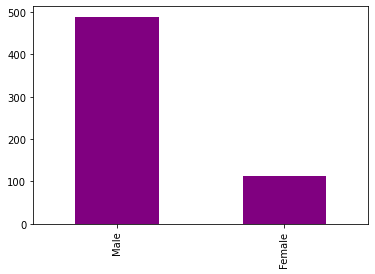

In [14]:
#Distribution du sexe des répondants
df_loan['Gender'].value_counts().plot.bar(color='purple')

In [15]:
#Gender repartition 
df_loan.groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


As we can see, there are much more males in this Dataset as well as the fact that most females are married.

In [16]:
#Basic statistics on the Dataset
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
loan_id = df_loan['Loan_ID']
loan_id

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [18]:
df_loan.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
del df_loan['Loan_ID']

In [21]:
#Dataset variable selection 
df_loan = pd.get_dummies(df_loan, drop_first = True)
df_loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [22]:
#Finding the most common values inside a list in Python. Here, we want to find the most common loan amount terms.
mcv_lat = list(df_loan['Loan_Amount_Term'])
most_common = max(mcv_lat, key = mcv_lat.count)
print(most_common)

360.0


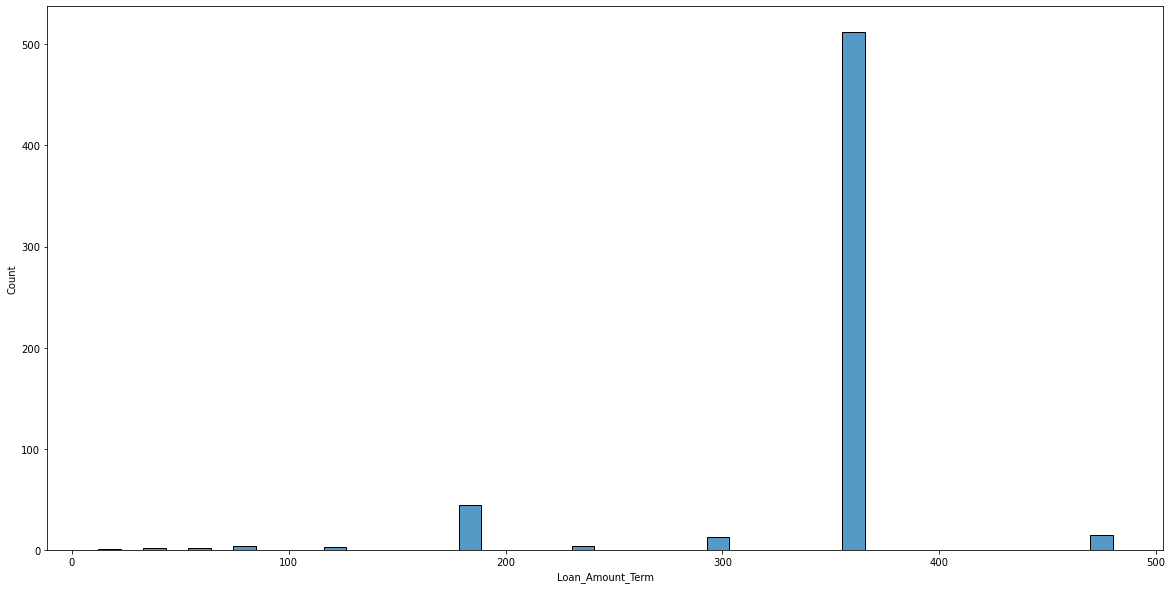

In [23]:
fig,ax = plt.subplots(figsize = (20,10))
g = sns.histplot(ax = ax,x ="Loan_Amount_Term", data = df_loan,bins = 45)

As we can see above, there are different loan amount terms with the most frequent being 360 days

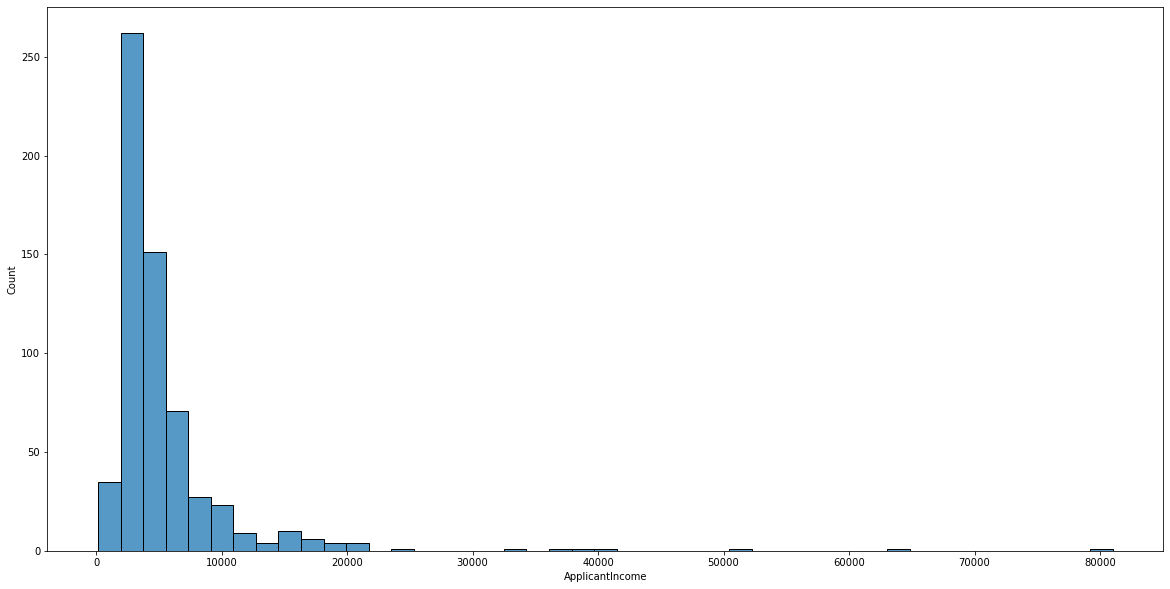

In [24]:
fig,ax = plt.subplots(figsize = (20,10))
g = sns.histplot(ax = ax,x ="ApplicantIncome", data = df_loan,bins = 45)

Most of the applicants' income is between 4000$ and 8000$ $

<AxesSubplot:>

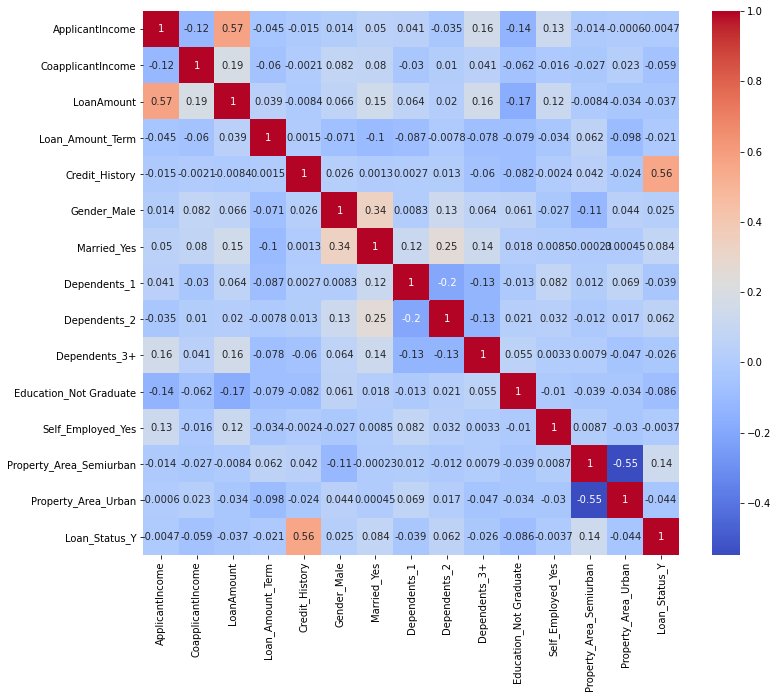

In [25]:
#Heatmap to figure out the correlations between our dataset's variables.
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(ax = ax ,data = df_loan.corr(), annot=True,cmap = 'coolwarm')

We can notice a correlation between the variables Loan_Status_Y and Credit_History as well as with the variables LoanAmount and ApplicantIncome. We will need to explore this further.

In [26]:
#Summary statistics for the loan amount grouped by loan status 
df_loan.groupby('Loan_Status_Y').describe().LoanAmount

,count,mean,std,min,25%,50%,75%,max
Loan_Status_Y,,,,,,,,
0,181.0,151.220994,85.862783,9.0,100.0,129.0,176.0,570.0
1,411.0,144.294404,85.484607,17.0,100.0,126.0,161.0,700.0


In [27]:
#Summary statistics for the loan amount grouped by Gender 
df_loan.groupby('Gender_Male').describe().LoanAmount 

,count,mean,std,min,25%,50%,75%,max
Gender_Male,,,,,,,,
0,122.0,135.418033,95.102454,9.0,93.25,115.0,142.25,700.0
1,470.0,149.265957,82.810851,17.0,104.00,130.0,175.00,650.0


In [28]:
#Summary statistics for the loan amount grouped by Married or not
df_loan.groupby('Married_Yes').describe().LoanAmount

,count,mean,std,min,25%,50%,75%,max
Married_Yes,,,,,,,,
0,208.0,129.173077,74.084420,9.0,88.0,116.0,148.5,650.0
1,384.0,155.750000,89.934267,17.0,108.0,132.0,178.5,700.0


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

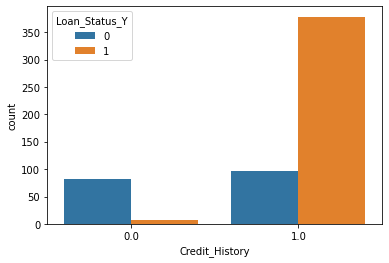

In [29]:
#History of the given loans based on Credit History
sns.countplot(x = 'Credit_History', data = df_loan, hue = 'Loan_Status_Y')

<AxesSubplot:xlabel='Gender_Male', ylabel='count'>

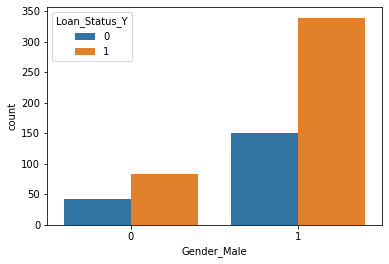

In [30]:
#History of the given loans based on genders.
sns.countplot(x = 'Gender_Male', data = df_loan, hue = 'Loan_Status_Y')

Surprisingly, males are more likely to get a loan than females.

<AxesSubplot:xlabel='Married_Yes', ylabel='count'>

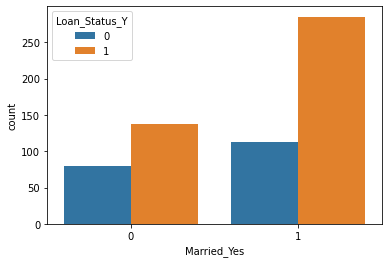

In [31]:
#History of the given loans based on Credit History
sns.countplot(x = 'Married_Yes', data = df_loan, hue = 'Loan_Status_Y')

<AxesSubplot:xlabel='Education_Not Graduate', ylabel='count'>

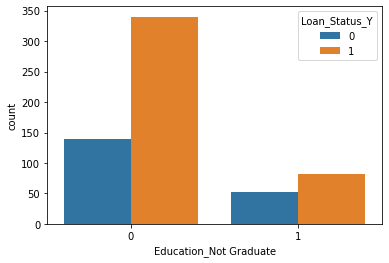

In [32]:
#History of the given loans based on education level
sns.countplot(x = 'Education_Not Graduate', data = df_loan, hue = 'Loan_Status_Y')

People who have already graduated are more likely to get a loan.

<AxesSubplot:xlabel='Dependents_1', ylabel='count'>

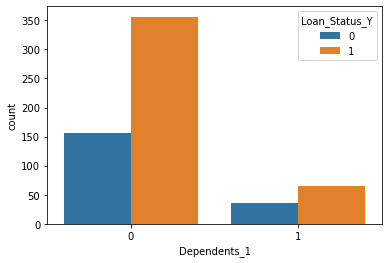

In [33]:
#Loan Status based on number of dependents 
sns.countplot(x = 'Dependents_1', data = df_loan, hue = 'Loan_Status_Y')

People who do not depend on anybody are much likely to get a loan.

<AxesSubplot:xlabel='Dependents_2', ylabel='count'>

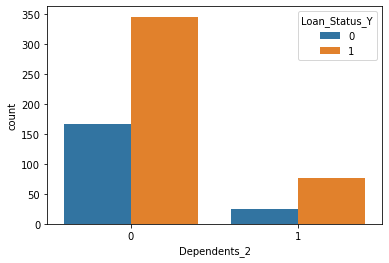

In [34]:
sns.countplot(x = 'Dependents_2', data = df_loan, hue = 'Loan_Status_Y')

<AxesSubplot:xlabel='Dependents_3+', ylabel='count'>

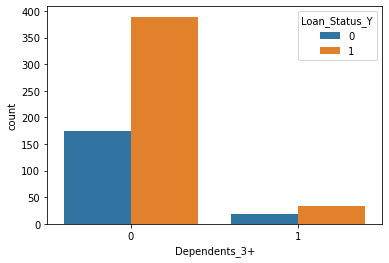

In [35]:
sns.countplot(x = 'Dependents_3+', data = df_loan, hue = 'Loan_Status_Y')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


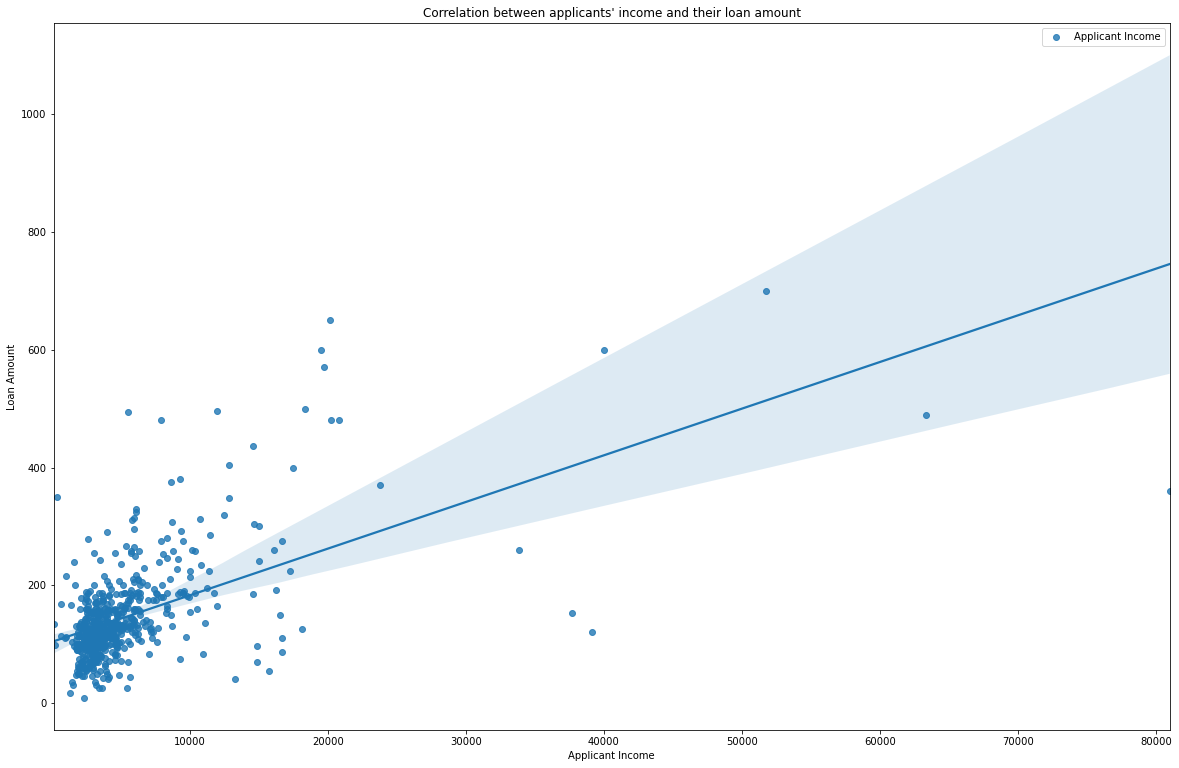

In [36]:
fig,ax= plt.subplots(figsize=(20,13))
sns.regplot(df_loan['ApplicantIncome'],df_loan['LoanAmount'], label='Applicant Income')
ax.set_title('Correlation between applicants\' income and their loan amount')
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Loan Amount')
ax.legend()
fig.show()

According to the graph above, we can conclude that the higher the applicant's income is, the higher his loan amount will be.

<function matplotlib.pyplot.show(close=None, block=None)>

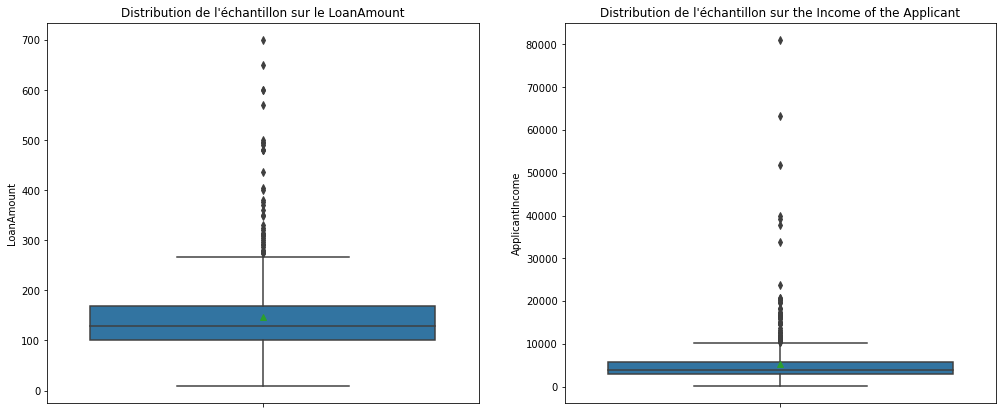

In [37]:
#Are there any outliers?
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.boxplot(y="LoanAmount", data= df_loan, showmeans=True)
plt.title("Distribution de l'échantillon sur le LoanAmount")
plt.subplot(1,2,2)
sns.boxplot(y="ApplicantIncome", data=df_loan, showmeans=True)
plt.title("Distribution de l'échantillon sur the Income of the Applicant")
plt.show

As we can see above, there are a lot of outliers in this dataset.

In [38]:
print("The maximum loan amount is equal to " + str(df_loan['LoanAmount'].max()) + " dollars")
print("The minimum loan amount is equal to " + str(df_loan['LoanAmount'].min()) + " dollars")
print("The average loan amount is equal to " + str(df_loan['LoanAmount'].mean()) + " dollars")

The maximum loan amount is equal to 700.0 dollars
The minimum loan amount is equal to 9.0 dollars
The average loan amount is equal to 146.41216216216216 dollars


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

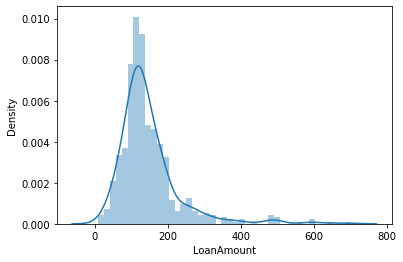

In [39]:
#Distribution over the variable Loan Amount 
sns.distplot(df_loan['LoanAmount'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

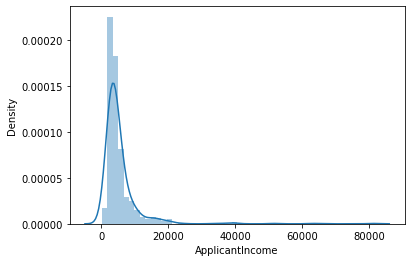

In [40]:
#Distribution over the variable Applicant Income 
sns.distplot(df_loan['ApplicantIncome'])

<function matplotlib.pyplot.show(close=None, block=None)>

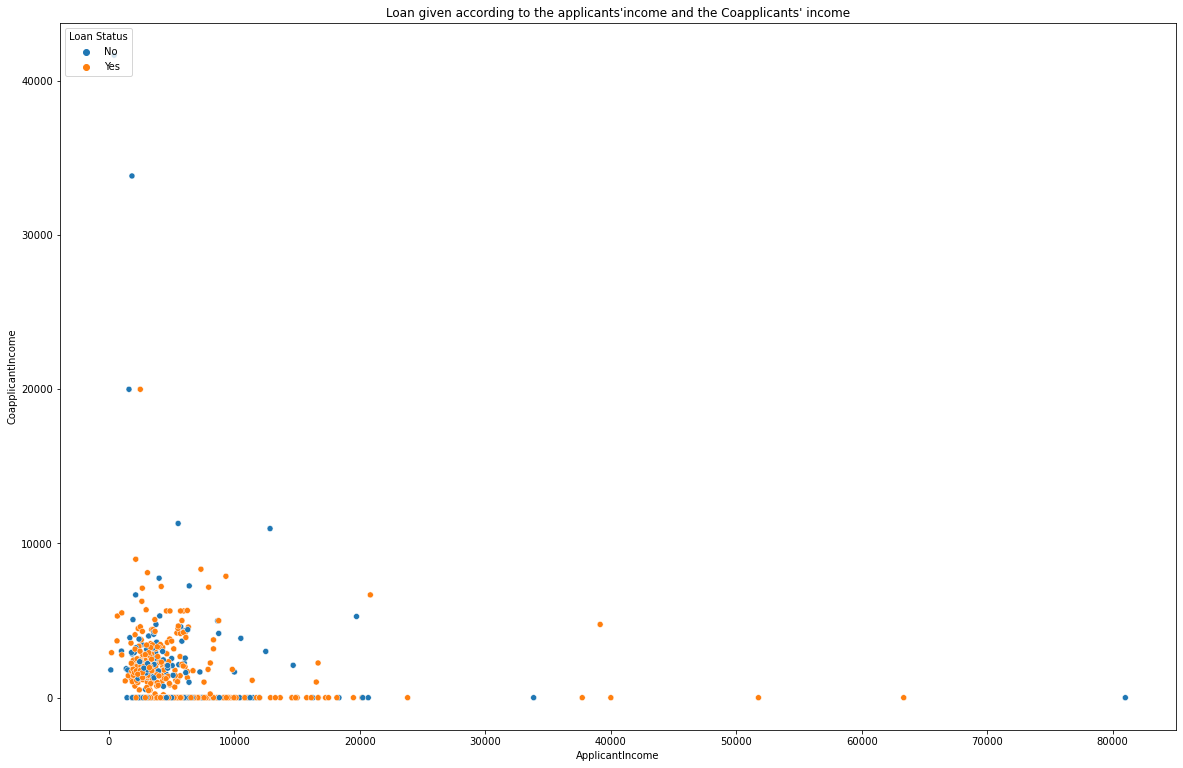

In [41]:
fig,ax= plt.subplots(figsize=(20,13))
graph=sns.scatterplot(data= df_loan, x="ApplicantIncome", y="CoapplicantIncome", hue="Loan_Status_Y")
plt.title("Loan given according to the applicants'income and the Coapplicants' income")
handles, labels  =  graph.get_legend_handles_labels()
graph.legend(handles, ['No', 'Yes'], title="Loan Status", loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

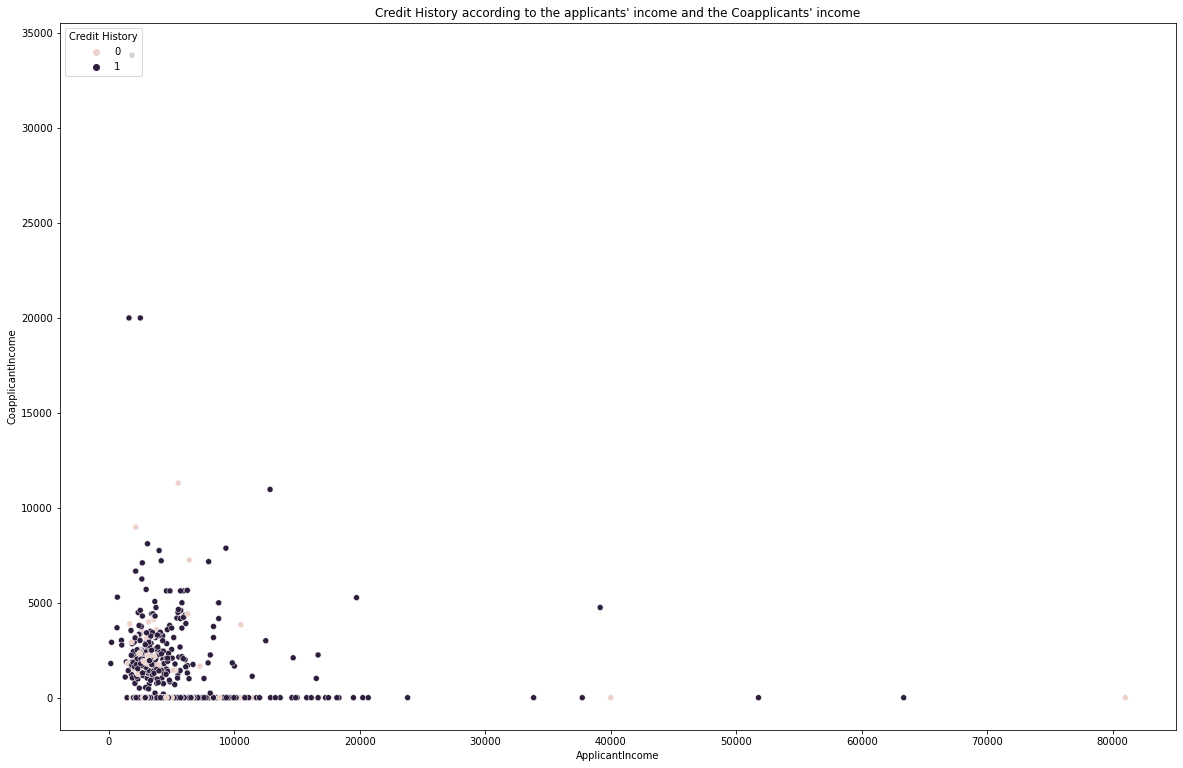

In [43]:
fig,ax= plt.subplots(figsize=(20,13))
graph=sns.scatterplot(data= df_loan, x="ApplicantIncome", y="CoapplicantIncome", hue="Credit_History")
plt.title("Credit History according to the applicants' income and the Coapplicants' income")
handles, labels  =  graph.get_legend_handles_labels()
graph.legend(handles, ['0', '1'], title="Credit History", loc='upper left')
plt.show

# Preprocessing

In [42]:
df_loan = df_loan.dropna()

In [43]:
df_loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [44]:
df_loan.isnull().any()

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term           False
Credit_History             False
Gender_Male                False
Married_Yes                False
Dependents_1               False
Dependents_2               False
Dependents_3+              False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
Loan_Status_Y              False
dtype: bool

In [45]:
#Target variable 
Y = df_loan["Loan_Status_Y"]
print(len(Y))
#Other variables 
X = df_loan.drop(["Loan_Status_Y"],axis = 1)
print(len(X))

529
529


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=10)

In [48]:
print("Nb de ligne de X_train = {}".format(len(X_train)))
print("Nb de ligne de X_test = {}".format(len(X_test)))
print("Nb de ligne de y_train = {}".format(len(Y_train)))
print("Nb de ligne de y_test = {}".format(len(Y_test)))

Nb de ligne de X_train = 423
Nb de ligne de X_test = 106
Nb de ligne de y_train = 423
Nb de ligne de y_test = 106


We are going to use the following models:
 - Decision Tree 
 - Random Forest 
 - Logistic Regression 
 - K-Nearest Neighbors

### Logistic Regression with Hyperparameters optimized

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [72]:
classifier_1 = LogisticRegression(C = 0.2335721469090121,penalty='l1',solver='liblinear', random_state = 10)
classifier_1.fit(X_train,Y_train)

LogisticRegression(C=0.2335721469090121, penalty='l1', random_state=10,
                   solver='liblinear')

In [73]:
#Model evaluation
print("Train score: {}".format(classifier_1.score(X_train, Y_train)))
print("Test score: {}".format(classifier_1.score(X_test, Y_test)))

Train score: 0.8297872340425532
Test score: 0.7735849056603774


<AxesSubplot:>

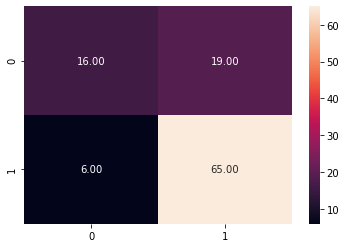

In [52]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, classifier_1.predict(X_test))
sns.heatmap(cm, annot=True, fmt=".2f")

In [53]:
#Feature importance 
pd.DataFrame({"Features": df_loan.columns[1:],"Values": (classifier_1.coef_.squeeze())})

,Features,Values
0,CoapplicantIncome,0.000013
1,LoanAmount,-0.000041
2,Loan_Amount_Term,-0.004376
3,Credit_History,-0.006550
4,Gender_Male,2.671487
5,Married_Yes,0.646095
6,Dependents_1,0.818117
7,Dependents_2,0.095409
8,Dependents_3+,0.470963
9,Education_Not Graduate,0.052650


Feature: 0, Score: 0.00001
Feature: 1, Score: -0.00004
Feature: 2, Score: -0.00438
Feature: 3, Score: -0.00655
Feature: 4, Score: 2.67149
Feature: 5, Score: 0.64610
Feature: 6, Score: 0.81812
Feature: 7, Score: 0.09541
Feature: 8, Score: 0.47096
Feature: 9, Score: 0.05265
Feature: 10, Score: -0.30523
Feature: 11, Score: -0.07959
Feature: 12, Score: 0.92869
Feature: 13, Score: -0.09461


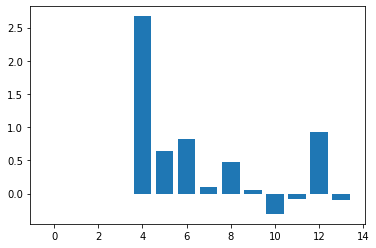

In [54]:
importance = classifier_1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### K-Nearest Neighbors with Hyperparameters optimized

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#Application du modèle de KNN
knn_model = KNeighborsClassifier(n_neighbors = 5, weights= 'uniform')
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [89]:
print("Train score: {}".format(knn_model.score(X_train, Y_train)))
print("Test score: {}".format(knn_model.score(X_test, Y_test)))

Train score: 0.7446808510638298
Test score: 0.6226415094339622


<AxesSubplot:>

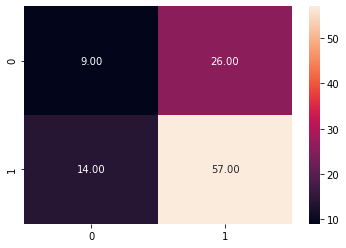

In [58]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, knn_model.predict(X_test))
sns.heatmap(cm, annot = True, fmt = ".2f")

In [59]:
#Models performance without optimization 
models_scores_table = pd.DataFrame({'Logistic Regression':[classifier_1.score(X_train, Y_train)],
                                    'K-Nearest Neighbors': [knn_model.score(X_train, Y_train)]},
                                  index=['Accuracy Score'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
models_scores_table

,Logistic Regression,K-Nearest Neighbors,Best Score
Accuracy Score,0.822695,0.744681,Logistic Regression


## Hyperparameters optimization 

### 1. With Logistic Regression 

In [57]:
param_grid_lr = [
    {'penalty': ['l1','l2','elasticnet','none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
    }]

In [58]:
clf = GridSearchCV(classifier_1, param_grid =param_grid_lr, cv = 3, verbose= True,n_jobs= -1)

best_clf = clf.fit(X_train,Y_train)

In [83]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

C = 0.23357214690901212

penalty='l1'

solver='liblinear'

### 2. With KNN

In [60]:
from sklearn.model_selection import KFold

In [61]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [62]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [64]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn_model, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

Best Hyperparameters:
GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')    

In [65]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

-0.6745378538856799
KNeighborsClassifier()
{'n_neighbors': 5, 'weights': 'uniform'}


Results:
{'n_neighbors': 5, 'weights': 'uniform'}


## Evaluation of the optimized model on the test set.

In [91]:
#import the data we need to predict
test = pd.read_csv('test_prediction.csv')
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [92]:
test.shape

(367, 12)

In [93]:
test = test.fillna(df_loan.median())

In [94]:
test['Dependents'] = test['Dependents'].fillna('1')

In [95]:
test['Gender'] = test['Gender'].fillna('Male')

In [96]:
test['ApplicantIncome'] = test['ApplicantIncome'].fillna(4805)

In [97]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')

In [98]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [99]:
test_loanid = test['Loan_ID']

In [100]:
del test['Loan_ID']

In [101]:
test.shape

(367, 11)

In [102]:
test_clean = test

In [103]:
test_clean = pd.get_dummies(test_clean, drop_first=True)
test_clean.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [104]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [105]:
X_test_1 = sc_x.fit_transform(test_clean)
X_test_1.shape

(367, 14)

In [106]:
X_train.shape

(423, 14)

## Applying the logistic regression model to predict loan eligibility.

In [107]:
pred = classifier_1.predict(X_test_1)

In [110]:
soumission = pd.DataFrame(pred, columns = ['Loan_Status'])
soumission

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [111]:
soumission = pd.concat([soumission,test_loanid], axis=1)
soumission

,Loan_Status,Loan_ID
0,1,LP001015
1,1,LP001022
2,1,LP001031
3,1,LP001035
4,1,LP001051
...,...,...
362,1,LP002971
363,1,LP002975
364,1,LP002980
365,1,LP002986


In [141]:
soumission.columns = ['Loan_ID', 'Loan_Status']
soumission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
